In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.pyplot import figure
import statsmodels.api as sm

In [2]:
# Load dataset and show all rows
df = pd.read_csv("credit_risk_dataset.csv")
pd.set_option("display.max_rows", None, "display.max_columns", None)
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [3]:
# getting shape of dataset
df.shape

(32581, 12)

In [4]:
# checking datatypes
print(df.dtypes)

person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object


In [5]:
# Describe Data
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [6]:
# Checking for Null values
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [7]:
def missing_values_table(df):
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum()/len(df)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : "Missing Values", 1 : "% of Total Values"})
    return mis_val_table_ren_columns
missing_values_table(df)


,Missing Values,% of Total Values
person_age,0,0.000000
person_income,0,0.000000
person_home_ownership,0,0.000000
person_emp_length,895,2.747000
loan_intent,0,0.000000
loan_grade,0,0.000000
loan_amnt,0,0.000000
loan_int_rate,3116,9.563856
loan_status,0,0.000000
loan_percent_income,0,0.000000


#### How to deal with missing value
In total there are 32,5K data entries, so our first choice is removing all the missing values from both "person_home_ownership" and "loan_int_rate" and our second choice is to use the mean of each column to replace the missing value. We will run the logistic regression model twice to see if the coeffients are significantly different. At this stage, we checked how many missing values from the two columns are in the same rows to see if we remove all the missing values, how many data entries are still available

In [8]:
rows_with_null_values = len(df.dropna(axis = 0, how = 'any'))
rows_with_null_values

28638

In [9]:
amount_of_null_values_per_row = df.isnull().sum(axis=1)
pd.Series(amount_of_null_values_per_row).value_counts()

0    28638
1     3875
2       68
dtype: int64

### Examine the variables and remove the outliers

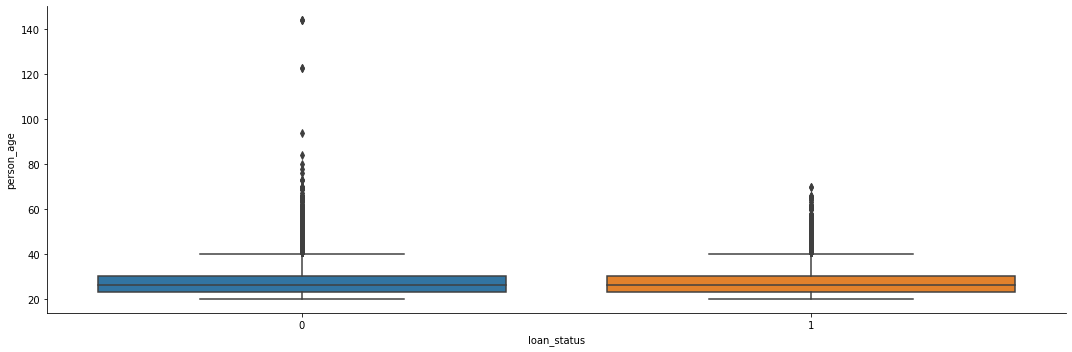

In [10]:
sns.catplot(y="person_age", x="loan_status",data=df, height=5,aspect=3,kind="box")
plt.show()

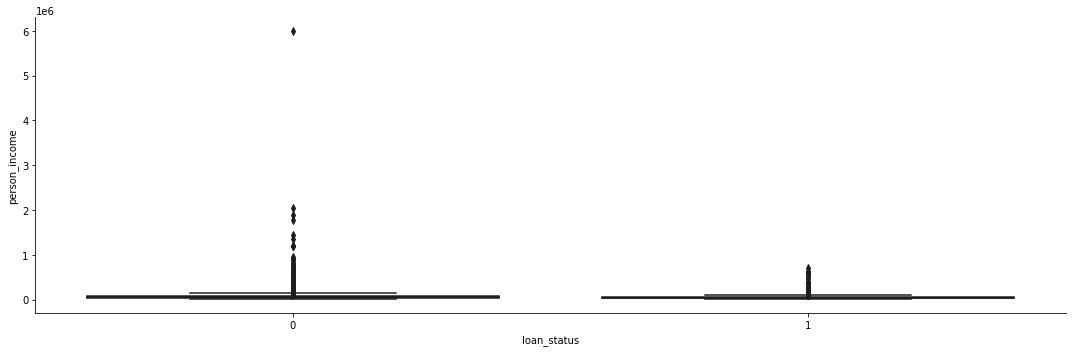

In [63]:
sns.catplot(y="person_income", x="loan_status",data=df, height=5,aspect=3,kind="box")
plt.show()

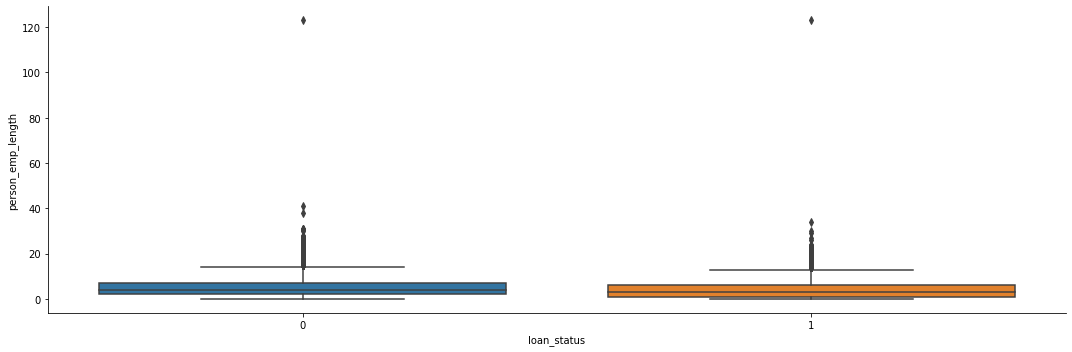

In [12]:
sns.catplot(y="person_emp_length", x="loan_status",data=df, height=5,aspect=3,kind="box")
plt.show()

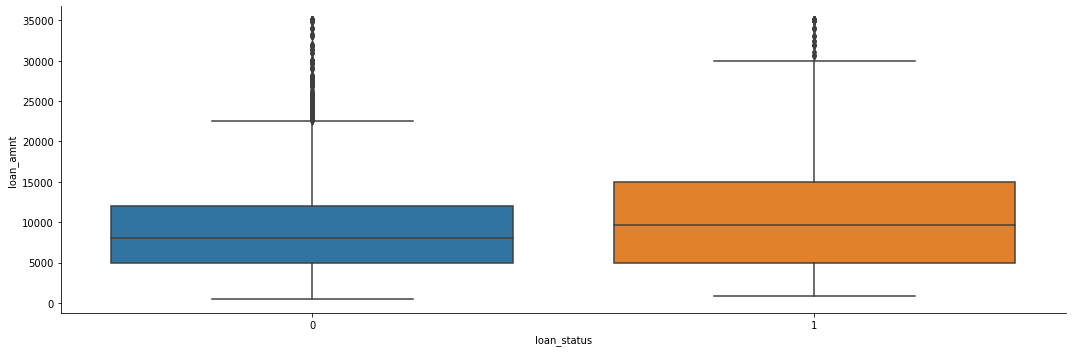

In [13]:
sns.catplot(y="loan_amnt", x="loan_status",data=df, height=5,aspect=3,kind="box")
plt.show()

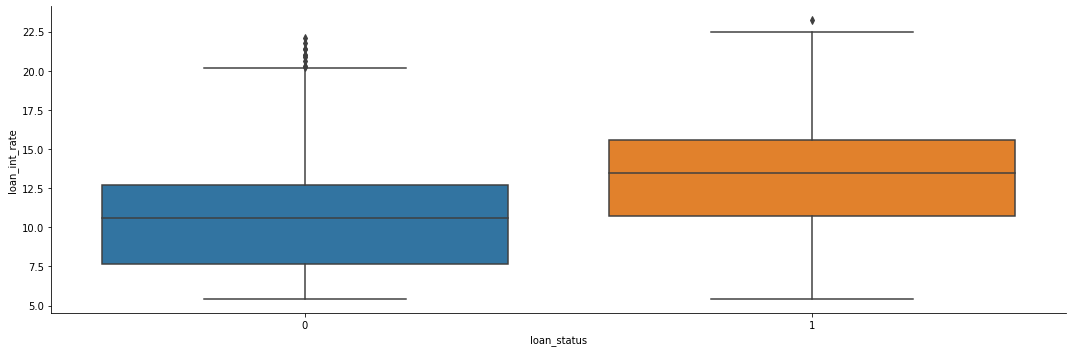

In [14]:
sns.catplot(y="loan_int_rate", x="loan_status",data=df, height=5,aspect=3,kind="box")
plt.show()

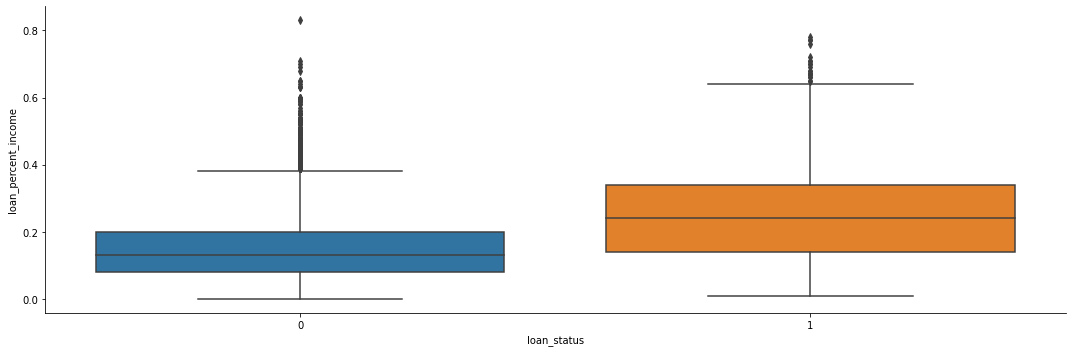

In [15]:
sns.catplot(y="loan_percent_income", x="loan_status",data=df, height=5,aspect=3,kind="box")
plt.show()

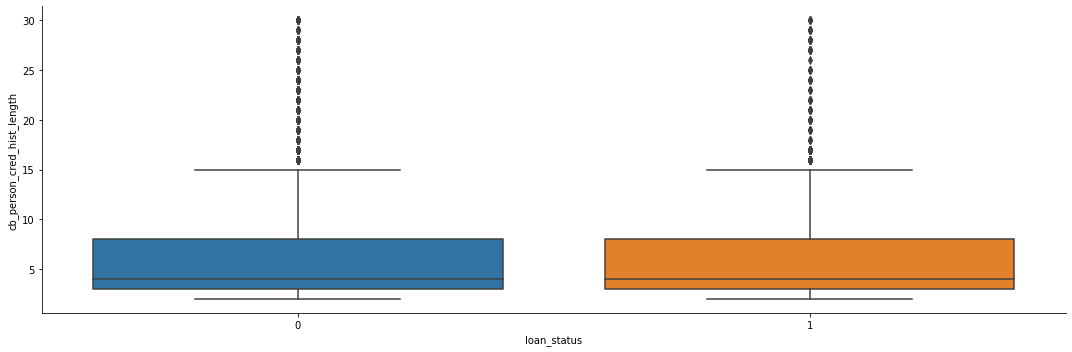

In [16]:
sns.catplot(y="cb_person_cred_hist_length", x="loan_status",data=df, height=5,aspect=3,kind="box")
plt.show()

In [17]:
df[df['loan_int_rate']>20]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
17,23,92111,RENT,7.0,MEDICAL,F,35000,20.25,1,0.32,N,4
448,26,103872,RENT,6.0,DEBTCONSOLIDATION,G,24000,20.03,1,0.23,N,4
451,26,108000,RENT,9.0,EDUCATION,G,24000,20.16,1,0.22,N,3
457,23,114750,RENT,2.0,MEDICAL,G,24000,20.03,1,0.18,Y,3
523,23,56000,RENT,8.0,MEDICAL,G,21600,21.21,1,0.39,Y,4
1189,24,54000,RENT,0.0,PERSONAL,G,16750,20.11,1,0.31,Y,2
1827,24,30000,RENT,5.0,MEDICAL,G,2000,21.27,1,0.07,Y,3
2436,22,23000,RENT,1.0,MEDICAL,F,2800,21.74,1,0.12,N,4
2620,22,37000,RENT,2.0,DEBTCONSOLIDATION,E,3000,20.30,1,0.08,N,2
2897,22,35000,MORTGAGE,NaN,VENTURE,F,5000,21.36,0,0.14,Y,2


In [18]:
df[df['loan_percent_income']>0.7]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
460,24,18000,OWN,6.0,PERSONAL,A,13000,7.88,1,0.72,N,3
571,21,19500,MORTGAGE,0.0,EDUCATION,B,15000,9.64,1,0.77,N,2
577,26,26000,RENT,10.0,EDUCATION,B,20050,9.76,1,0.77,N,2
640,22,20000,MORTGAGE,0.0,PERSONAL,B,16600,9.76,0,0.83,N,3
2452,25,32004,MORTGAGE,3.0,PERSONAL,A,22750,6.17,0,0.71,N,4
10007,21,13000,RENT,0.0,DEBTCONSOLIDATION,C,9250,12.53,1,0.71,N,3
18203,30,32004,RENT,1.0,PERSONAL,B,24250,11.12,1,0.76,N,5
23727,32,12000,RENT,1.0,MEDICAL,A,9325,8.38,1,0.78,N,6
27878,33,10080,OWN,11.0,VENTURE,A,7200,6.03,1,0.71,N,8


In [19]:
# removing outliers for person_age > 100
# removing outliers for person_emp_length > 50
# removing outliers for person_income > 600k

In [20]:
df[df['person_age']>100]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
81,144,250000,RENT,4.0,VENTURE,C,4800,13.57,0,0.02,N,3
183,144,200000,MORTGAGE,4.0,EDUCATION,B,6000,11.86,0,0.03,N,2
575,123,80004,RENT,2.0,EDUCATION,B,20400,10.25,0,0.25,N,3
747,123,78000,RENT,7.0,VENTURE,B,20000,NaN,0,0.26,N,4
32297,144,6000000,MORTGAGE,12.0,PERSONAL,C,5000,12.73,0,0.00,N,25


In [21]:
df[df['person_emp_length']>50]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
210,21,192000,MORTGAGE,123.0,VENTURE,A,20000,6.54,0,0.10,N,4


In [22]:
df[df['person_income']>5000000]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
32297,144,6000000,MORTGAGE,12.0,PERSONAL,C,5000,12.73,0,0.0,N,25


In [23]:
# data does not seem plausible, so we can reomove these rows without doing a mistake

In [24]:
df_clean = df[(df['person_age']<=100)&(df['person_emp_length']<=50)&(df['person_income']<=5000000)]
df_clean.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2


In [25]:
df_clean = df_clean.sort_values(by="loan_grade")
df_clean.head(10)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
24285,31,60000,RENT,4.0,HOMEIMPROVEMENT,A,4200,8.49,0,0.07,N,10
9577,21,25200,RENT,1.0,EDUCATION,A,8250,7.49,1,0.33,N,4
9578,23,30000,RENT,5.0,MEDICAL,A,8250,7.51,0,0.28,N,4
22777,34,58000,MORTGAGE,18.0,HOMEIMPROVEMENT,A,4000,5.42,0,0.07,N,8
9582,23,62500,MORTGAGE,7.0,VENTURE,A,4000,7.43,0,0.06,N,3
22774,28,18000,RENT,9.0,HOMEIMPROVEMENT,A,7600,8.49,1,0.42,N,9
22770,27,85000,RENT,1.0,DEBTCONSOLIDATION,A,7525,NaN,0,0.09,N,8
9590,25,30000,RENT,0.0,HOMEIMPROVEMENT,A,8300,8.90,1,0.28,N,3
22766,31,58000,MORTGAGE,15.0,VENTURE,A,8875,NaN,0,0.15,N,6
9592,21,50000,RENT,5.0,DEBTCONSOLIDATION,A,8300,8.90,0,0.17,N,4


### Visualise the relations between / among different varibales 

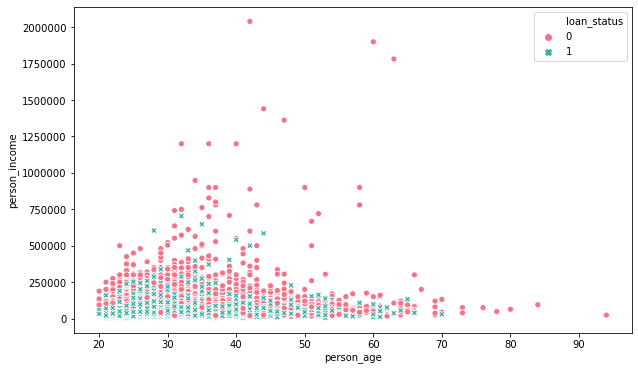

In [26]:
fig, ax = plt.subplots(figsize=(10,6))
ax.ticklabel_format(style='plain')
sns.scatterplot(x="person_age", y="person_income", data=df_clean, hue="loan_status", style="loan_status", palette="husl")

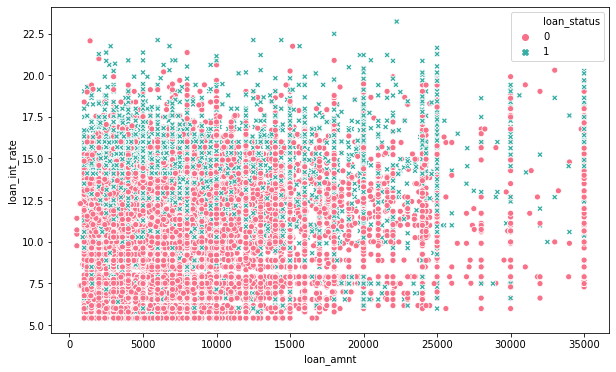

In [27]:
fig, ax = plt.subplots(figsize=(10,6))
sns.scatterplot(x="loan_amnt", y="loan_int_rate", data=df_clean, hue="loan_status", style="loan_status", palette="husl")

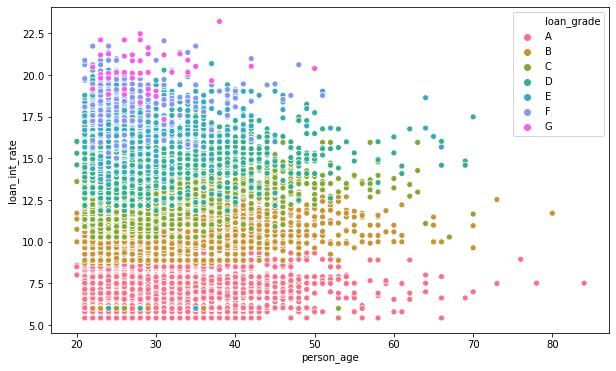

In [28]:
fig, ax = plt.subplots(figsize=(10,6))
sns.scatterplot(x="person_age", y="loan_int_rate", data=df_clean, hue="loan_grade", palette="husl")

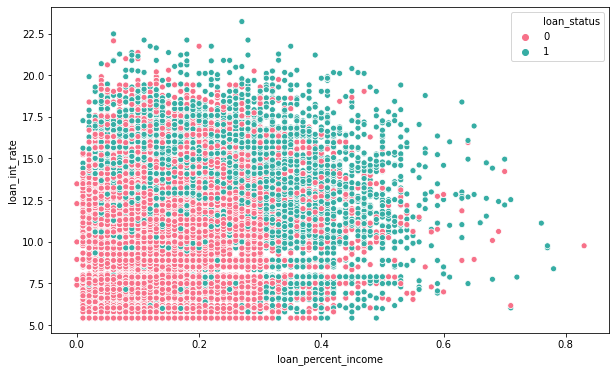

In [29]:
fig, ax = plt.subplots(figsize=(10,6))
sns.scatterplot(x="loan_percent_income", y="loan_int_rate", data=df_clean, hue="loan_status", palette="husl")

In [30]:
# Loan_grade
loan_grade_tab = pd.crosstab(df_clean['loan_grade'], df_clean['loan_status'])
loan_grade_tab

loan_status,0,1
loan_grade,,
A,9379,991
B,8561,1622
C,5036,1283
D,1466,2089
E,341,611
F,70,166
G,1,63


In [31]:
# number of customers per loan grade
a_grade=loan_grade_tab.iloc[0].sum()
b_grade=loan_grade_tab.iloc[1].sum()
c_grade=loan_grade_tab.iloc[2].sum()
d_grade=loan_grade_tab.iloc[3].sum()
e_grade=loan_grade_tab.iloc[4].sum()
f_grade=loan_grade_tab.iloc[5].sum()
g_grade=loan_grade_tab.iloc[6].sum()
# number of customers per loan grade who default
a_grade_default=loan_grade_tab.iloc[0,1].sum()
b_grade_default=loan_grade_tab.iloc[1,1].sum()
c_grade_default=loan_grade_tab.iloc[2,1].sum()
d_grade_default=loan_grade_tab.iloc[3,1].sum()
e_grade_default=loan_grade_tab.iloc[4,1].sum()
f_grade_default=loan_grade_tab.iloc[5,1].sum()
g_grade_default=loan_grade_tab.iloc[6,1].sum()
# % number of customers per loan grade who default
a_pers= round(a_grade_default / a_grade * 100, 2)
b_pers= round(b_grade_default / b_grade * 100, 2)
c_pers= round(c_grade_default / c_grade * 100, 2)
d_pers= round(d_grade_default / d_grade * 100, 2)
e_pers= round(e_grade_default / e_grade * 100, 2)
f_pers= round(f_grade_default / f_grade * 100, 2)
g_pers= round(g_grade_default / g_grade * 100, 2)
print("{} % of clients with grade a have defaulted.".format(a_pers))
print("{} % of clients with grade b have defaulted.".format(b_pers))
print("{} % of clients with grade c have defaulted.".format(c_pers))
print("{} % of clients with grade d have defaulted.".format(d_pers))
print("{} % of clients with grade e have defaulted.".format(e_pers))
print("{} % of clients with grade f have defaulted.".format(f_pers))
print("{} % of clients with grade g have defaulted.".format(g_pers))

9.56 % of clients with grade a have defaulted.
15.93 % of clients with grade b have defaulted.
20.3 % of clients with grade c have defaulted.
58.76 % of clients with grade d have defaulted.
64.18 % of clients with grade e have defaulted.
70.34 % of clients with grade f have defaulted.
98.44 % of clients with grade g have defaulted.


In [32]:
data_non_default = df_clean[(df_clean["loan_status"]==0)]
data_default = df_clean[(df_clean["loan_status"]==1)]
data_non_default_groupby_grade = data_non_default.groupby("loan_grade").count().reset_index()
data_default_groupby_grade = data_default.groupby("loan_grade").count().reset_index()
data_non_default_groupby_grade

,loan_grade,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,A,9379,9379,9379,9379,9379,9379,8497,9379,9379,9379,9379
1,B,8561,8561,8561,8561,8561,8561,7696,8561,8561,8561,8561
2,C,5036,5036,5036,5036,5036,5036,4540,5036,5036,5036,5036
3,D,1466,1466,1466,1466,1466,1466,1325,1466,1466,1466,1466
4,E,341,341,341,341,341,341,308,341,341,341,341
5,F,70,70,70,70,70,70,63,70,70,70,70
6,G,1,1,1,1,1,1,1,1,1,1,1


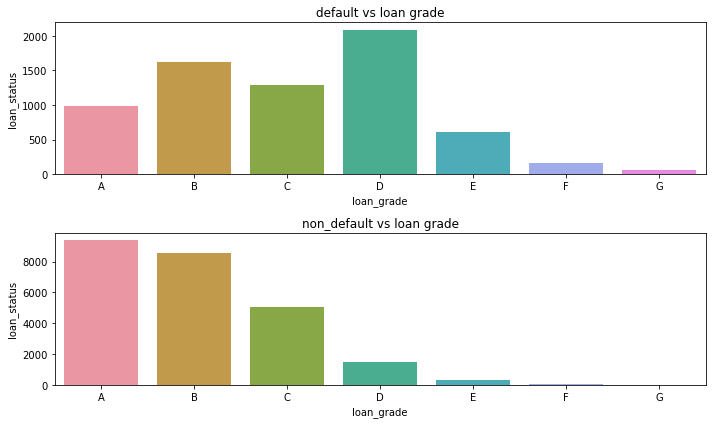

In [33]:
fig, axes=plt.subplots(2,1, figsize=(10,6))
sns.set_palette("magma")
sns.barplot(ax=axes[0],x="loan_grade", y="loan_status", data=data_default_groupby_grade)
axes[0].set_title("default vs loan grade")

sns.barplot(ax=axes[1], x="loan_grade", y="loan_status", data=data_non_default_groupby_grade)
axes[1].set_title("non_default vs loan grade")

plt.tight_layout()

In [34]:
# Person_home_ownership
default_hist_status_tab = pd.crosstab(df_clean['person_home_ownership'], df_clean['loan_status'])
default_hist_status_tab

loan_status,0,1
person_home_ownership,,
MORTGAGE,11460,1630
OTHER,74,33
OWN,2243,167
RENT,11077,4995


In [35]:
# number of customers per home ownership
mortgage=default_hist_status_tab.iloc[0].sum()
other=default_hist_status_tab.iloc[1].sum()
own=default_hist_status_tab.iloc[2].sum()
rent=default_hist_status_tab.iloc[3].sum()
# number of customers per home ownership who default
mortgage_default=default_hist_status_tab.iloc[0,1].sum()
other_default=default_hist_status_tab.iloc[1,1].sum()
own_default=default_hist_status_tab.iloc[2,1].sum()
rent_default=default_hist_status_tab.iloc[3,1].sum()
# % number of customers per home ownership who default
mortgage_pers= round(mortgage_default / mortgage * 100, 2)
other_pers= round(other_default / other * 100, 2)
own_pers= round(own_default / own * 100, 2)
rent_pers= round(rent_default / rent * 100, 2)
print("{} % of clients with a mortgage have defaulted.".format(mortgage_pers))
print("{} % of clients with other living situation have defaulted.".format(other_pers))
print("{} % of clients with a own home have defaulted.".format(own_pers))
print("{} % of clients with a rented home have defaulted.".format(rent_pers))

12.45 % of clients with a mortgage have defaulted.
30.84 % of clients with other living situation have defaulted.
6.93 % of clients with a own home have defaulted.
31.08 % of clients with a rented home have defaulted.


In [36]:
data_non_default = df[(df["loan_status"]==0)]
data_default = df[(df["loan_status"]==1)]
data_non_default_groupby_grade = data_non_default.groupby("person_home_ownership").count().reset_index()
data_default_groupby_grade = data_default.groupby("person_home_ownership").count().reset_index()
data_non_default_groupby_grade

,person_home_ownership,person_age,person_income,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,MORTGAGE,11754,11754,11463,11754,11754,11754,10583,11754,11754,11754,11754
1,OTHER,74,74,74,74,74,74,67,74,74,74,74
2,OWN,2391,2391,2243,2391,2391,2391,2187,2391,2391,2391,2391
3,RENT,11254,11254,11080,11254,11254,11254,10164,11254,11254,11254,11254


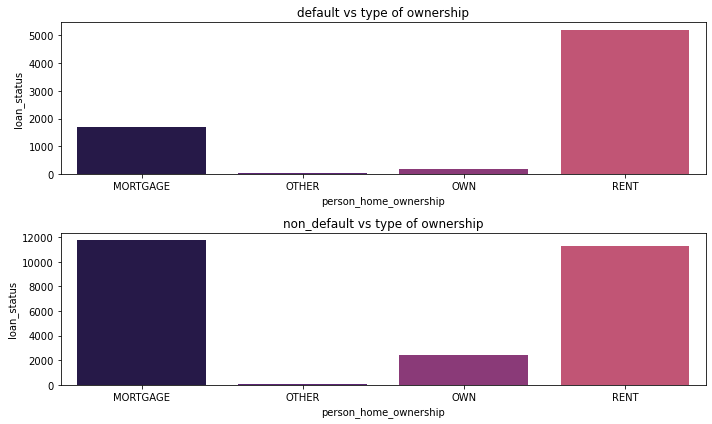

In [37]:
fig, axes=plt.subplots(2,1, figsize=(10,6))

sns.barplot(ax=axes[0],x="person_home_ownership", y="loan_status", data=data_default_groupby_grade)
axes[0].set_title("default vs type of ownership")

sns.barplot(ax=axes[1], x="person_home_ownership", y="loan_status", data=data_non_default_groupby_grade)
axes[1].set_title("non_default vs type of ownership")

plt.tight_layout()

In [38]:
# Loan_intent
intent_tab = pd.crosstab(df_clean['loan_intent'], df_clean['loan_status'])
intent_tab

loan_status,0,1
loan_intent,,
DEBTCONSOLIDATION,3627,1437
EDUCATION,5222,1066
HOMEIMPROVEMENT,2613,897
MEDICAL,4332,1565
PERSONAL,4321,1046
VENTURE,4739,814


In [39]:
# number of customers per rason
debt_consolidation=intent_tab.iloc[0].sum()
education=intent_tab.iloc[1].sum()
homeimprovement=intent_tab.iloc[2].sum()
medical=intent_tab.iloc[3].sum()
personal=intent_tab.iloc[4].sum()
venture=intent_tab.iloc[5].sum()
# number of customers per lreason who default
debt_consolidation_default=intent_tab.iloc[0,1].sum()
education_default=intent_tab.iloc[1,1].sum()
homeimprovement_default=intent_tab.iloc[2,1].sum()
medical_default=intent_tab.iloc[3,1].sum()
personal_default=intent_tab.iloc[4,1].sum()
venture_default=intent_tab.iloc[5,1].sum()
# % number of customers per reason who default
debt_consolidation_pers= round(debt_consolidation_default / debt_consolidation * 100, 2)
education_pers= round(education_default / education * 100, 2)
homeimporvement_pers= round(homeimprovement_default / homeimprovement * 100, 2)
medical_pers= round(medical_default / medical * 100, 2)
personal_pers= round(personal_default / personal * 100, 2)
venture_pers= round(venture_default / venture * 100, 2)
print("{} % of clients with a loan for debt_consolidation have defaulted.".format(debt_consolidation_pers))
print("{} % of clients with a loan for education have defaulted.".format(education_pers))
print("{} % of clients with a loan for homeimprovement have defaulted.".format(homeimporvement_pers))
print("{} % of clients with a loan for medical have defaulted.".format(medical_pers))
print("{} % of clients with a loan for personal have defaulted.".format(personal_pers))
print("{} % of clients with a loan for venture have defaulted.".format(venture_pers))

28.38 % of clients with a loan for debt_consolidation have defaulted.
16.95 % of clients with a loan for education have defaulted.
25.56 % of clients with a loan for homeimprovement have defaulted.
26.54 % of clients with a loan for medical have defaulted.
19.49 % of clients with a loan for personal have defaulted.
14.66 % of clients with a loan for venture have defaulted.


In [40]:
data_non_default = df[(df["loan_status"]==0)]
data_default = df[(df["loan_status"]==1)]
data_non_default_groupby_grade = data_non_default.groupby("loan_intent").count().reset_index()
data_default_groupby_grade = data_default.groupby("loan_intent").count().reset_index()
data_non_default_groupby_grade

,loan_intent,person_age,person_income,person_home_ownership,person_emp_length,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,DEBTCONSOLIDATION,3722,3722,3722,3627,3722,3722,3357,3722,3722,3722,3722
1,EDUCATION,5342,5342,5342,5224,5342,5342,4843,5342,5342,5342,5342
2,HOMEIMPROVEMENT,2664,2664,2664,2613,2664,2664,2427,2664,2664,2664,2664
3,MEDICAL,4450,4450,4450,4332,4450,4450,3980,4450,4450,4450,4450
4,PERSONAL,4423,4423,4423,4322,4423,4423,4004,4423,4423,4423,4423
5,VENTURE,4872,4872,4872,4742,4872,4872,4390,4872,4872,4872,4872


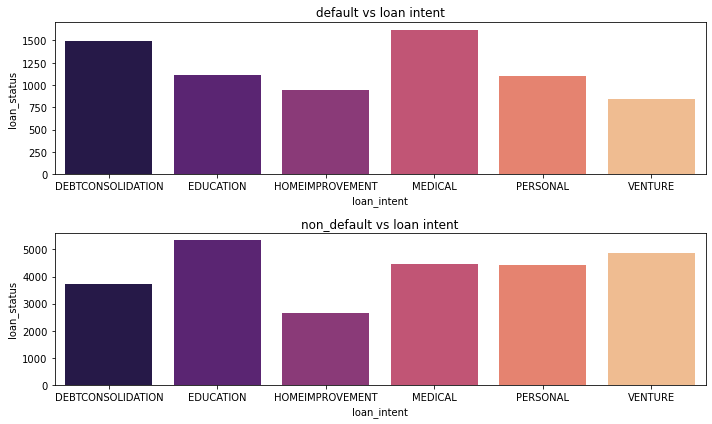

In [41]:
fig, axes=plt.subplots(2,1, figsize=(10,6))

sns.barplot(ax=axes[0],x="loan_intent", y="loan_status", data=data_default_groupby_grade)
axes[0].set_title("default vs loan intent")

sns.barplot(ax=axes[1], x="loan_intent", y="loan_status", data=data_non_default_groupby_grade)
axes[1].set_title("non_default vs loan intent")

plt.tight_layout()

In [42]:
# cb_person_default_on_file
default_hist_status_tab = pd.crosstab(df_clean['cb_person_default_on_file'], df_clean['loan_status'])
default_hist_status_tab

loan_status,0,1
cb_person_default_on_file,,
N,21340,4711
Y,3514,2114


In [43]:
# number of customers whith no bad history
no_history = default_hist_status_tab.iloc[0].sum()
print(no_history,"customers did not have a previous default history")
# customers with "bad credit" history
history = default_hist_status_tab.iloc[1].sum()
print(history,"customers had a previous default history")
# number of customers with no bad history who have defaulted
defaulted_no = default_hist_status_tab.iloc[0,1]
print(defaulted_no,"customers with no previous default history have defaulted")
# number of customers with bad history who have defaulted
defaulted_yes = default_hist_status_tab.iloc[1,1]
print(defaulted_yes,"customers who previously defaulted have defaulted again")
# % of clients with no bad history have defaulted
# % of clients with bad history have defaulted
defaulted_no_perc = round(defaulted_no / no_history * 100, 2)
defaulted_yes_perc = round(defaulted_yes / history * 100, 2)
print("{} % of clients with no previous default history have defaulted.".format(defaulted_no_perc))
print("And {} % of clients who had previously defaulted, defaulted again.".format(defaulted_yes_perc))

26051 customers did not have a previous default history
5628 customers had a previous default history
4711 customers with no previous default history have defaulted
2114 customers who previously defaulted have defaulted again
18.08 % of clients with no previous default history have defaulted.
And 37.56 % of clients who had previously defaulted, defaulted again.


In [44]:
data_non_default = df_clean[(df_clean["loan_status"]==0)]
data_default = df_clean[(df_clean["loan_status"]==1)]
data_non_default_groupby_grade = data_non_default.groupby("cb_person_default_on_file").count().reset_index()
data_default_groupby_grade = data_default.groupby("cb_person_default_on_file").count().reset_index()
data_non_default_groupby_grade

,cb_person_default_on_file,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
0,N,21340,21340,21340,21340,21340,21340,21340,19254,21340,21340,21340
1,Y,3514,3514,3514,3514,3514,3514,3514,3176,3514,3514,3514


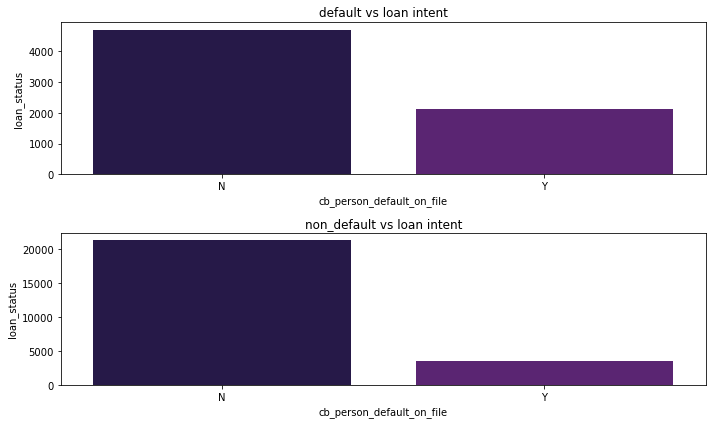

In [45]:
fig, axes=plt.subplots(2,1, figsize=(10,6))

sns.barplot(ax=axes[0],x="cb_person_default_on_file", y="loan_status", data=data_default_groupby_grade)
axes[0].set_title("default vs loan intent")

sns.barplot(ax=axes[1], x="cb_person_default_on_file", y="loan_status", data=data_non_default_groupby_grade)
axes[1].set_title("non_default vs loan intent")

plt.tight_layout()

In [46]:
# percentage of total defaults
total_default = round((defaulted_no+defaulted_yes) / (no_history+history) *100,2)
print("{}% of total clients population have defaulted.".format(total_default))

21.54% of total clients population have defaulted.


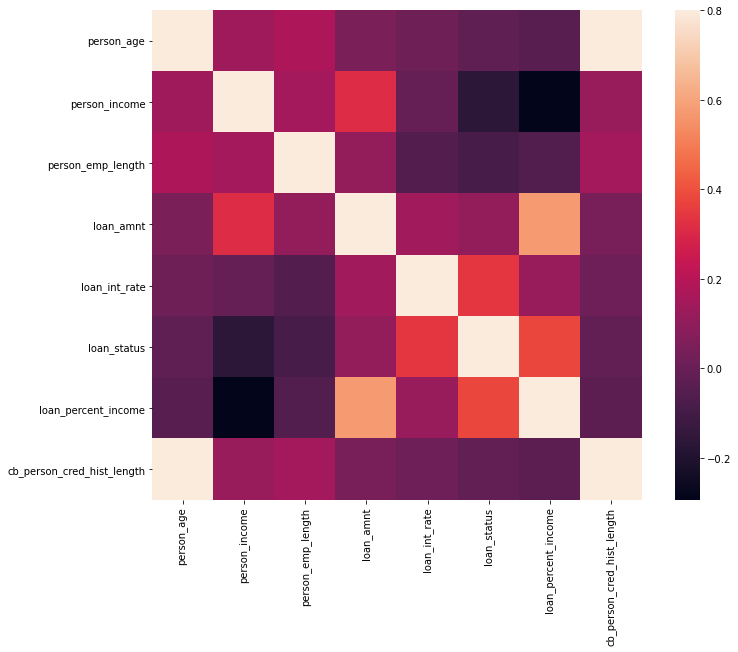

In [47]:
# Correlation matrix
corrmat = df_clean.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

In [48]:
df_clean.corr()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
person_age,1.000000,0.141562,0.172554,0.052208,0.010370,-0.022130,-0.040311,0.878258
person_income,0.141562,1.000000,0.154746,0.314667,-0.003767,-0.164128,-0.293433,0.124272
person_emp_length,0.172554,0.154746,1.000000,0.110993,-0.058263,-0.085966,-0.058559,0.149404
loan_amnt,0.052208,0.314667,0.110993,1.000000,0.145895,0.112188,0.577004,0.042678
loan_int_rate,0.010370,-0.003767,-0.058263,0.145895,1.000000,0.339307,0.123401,0.015330
loan_status,-0.022130,-0.164128,-0.085966,0.112188,0.339307,1.000000,0.379823,-0.016830
loan_percent_income,-0.040311,-0.293433,-0.058559,0.577004,0.123401,0.379823,1.000000,-0.030683
cb_person_cred_hist_length,0.878258,0.124272,0.149404,0.042678,0.015330,-0.016830,-0.030683,1.000000


In [52]:
# person_age and cb_person_cred_hist_length are highly correlated , we think cb_person_cred_hist_length is a more interesting variable.
# loan_amount and and loan_percent_income are highly correlated, we think loan_percent_income is more interesting variable.
# to avoid multicollinearity, remove person age from data frame as well as loan_amount
df_clean_final = df_clean.drop(['person_age', "loan_amnt"], axis=1)
df_clean_final.head()

,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
24285,60000,RENT,4.0,HOMEIMPROVEMENT,A,8.49,0,0.07,N,10
9577,25200,RENT,1.0,EDUCATION,A,7.49,1,0.33,N,4
9578,30000,RENT,5.0,MEDICAL,A,7.51,0,0.28,N,4
22777,58000,MORTGAGE,18.0,HOMEIMPROVEMENT,A,5.42,0,0.07,N,8
9582,62500,MORTGAGE,7.0,VENTURE,A,7.43,0,0.06,N,3


In [55]:
# create dummy variables for nummeric variables
df_dum = pd.concat([pd.get_dummies(df_clean_final['person_home_ownership'], drop_first=True), pd.get_dummies(df_clean_final['loan_intent'], drop_first=True), pd.get_dummies(df_clean_final['loan_grade'], drop_first=True),pd.get_dummies(df_clean_final['cb_person_default_on_file'], drop_first=True)], axis=1)
# df_merged = df_clean.merge(df_dum, left_index = True, right_index = True)
df_dum.head()

,OTHER,OWN,RENT,EDUCATION,HOMEIMPROVEMENT,MEDICAL,PERSONAL,VENTURE,B,C,D,E,F,G,Y
24285,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
9577,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0
9578,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
22777,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9582,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


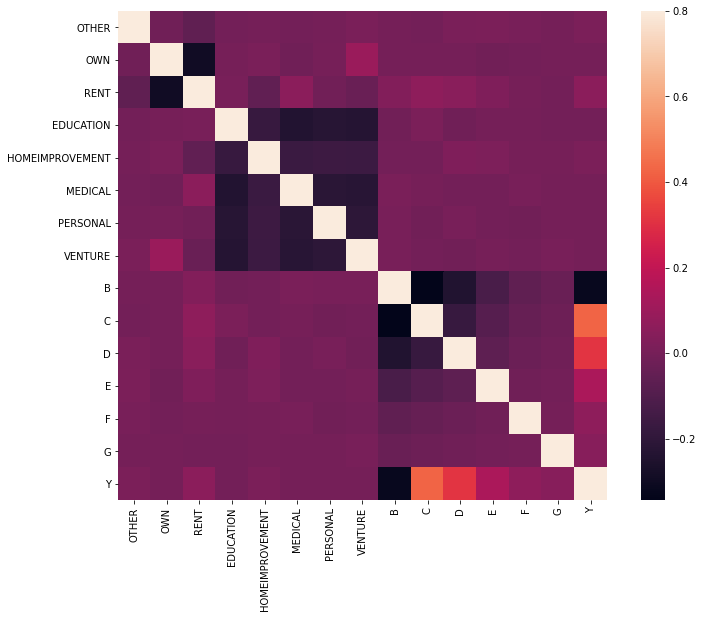

In [56]:
corrmat_2 = df_dum.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(corrmat_2, vmax = .8, square = True)
plt.show()

In [58]:
df_dum.corr()

,OTHER,OWN,RENT,EDUCATION,HOMEIMPROVEMENT,MEDICAL,PERSONAL,VENTURE,B,C,D,E,F,G,Y
OTHER,1.000000,-0.016705,-0.059077,-0.005782,0.000250,-0.004079,-0.000185,0.010366,-0.000459,-0.005914,0.013777,0.015247,0.007611,-0.002619,0.014221
OWN,-0.016705,1.000000,-0.291192,0.003175,0.012508,-0.013343,0.001810,0.097564,-0.003742,-0.001705,0.000208,-0.012849,-0.006859,0.000348,-0.001294
RENT,-0.059077,-0.291192,1.000000,0.005359,-0.056678,0.056975,-0.010586,-0.035082,0.035795,0.063381,0.053693,0.025523,0.003868,-0.006285,0.057767
EDUCATION,-0.005782,0.003175,0.005359,1.000000,-0.175665,-0.237998,-0.224753,-0.229427,-0.008682,0.016188,-0.014702,-0.001837,-0.001697,-0.006527,-0.006027
HOMEIMPROVEMENT,0.000250,0.012508,-0.056678,-0.175665,1.000000,-0.168820,-0.159425,-0.162740,-0.008240,-0.004817,0.026162,0.020334,0.004504,0.004275,0.015635
MEDICAL,-0.004079,-0.013343,0.056975,-0.237998,-0.168820,1.000000,-0.215996,-0.220488,0.011192,0.000554,-0.005334,-0.005327,0.006667,0.000156,-0.003956
PERSONAL,-0.000185,0.001810,-0.010586,-0.224753,-0.159425,-0.215996,1.000000,-0.208217,0.007534,-0.009593,0.006590,-0.008520,-0.009769,-0.001579,-0.003850
VENTURE,0.010366,0.097564,-0.035082,-0.229427,-0.162740,-0.220488,-0.208217,1.000000,0.005871,-0.006577,-0.012403,0.003464,-0.004218,0.005143,-0.003373
B,-0.000459,-0.003742,0.035795,-0.008682,-0.008240,0.011192,0.007534,0.005871,1.000000,-0.343565,-0.244704,-0.121148,-0.059628,-0.030967,-0.319907
C,-0.005914,-0.001705,0.063381,0.016188,-0.004817,0.000554,-0.009593,-0.006577,-0.343565,1.000000,-0.177472,-0.087863,-0.043246,-0.022459,0.424999


In [64]:
ave_length = df_clean_final["person_emp_length"].sum()/(df_clean_final["person_emp_length"].size-df_clean_final["person_emp_length"].isnull().sum())
ave_ir = df_clean_final["loan_int_rate"].sum()/(df_clean_final["loan_int_rate"].size-df_clean_final["loan_int_rate"].isnull().sum())
# print(round(ave_length,2), round(ave_ir,2))
print(ave_length, ave_ir)

4.782063827772341 11.039701383067895


### Logistic Regression

Logstic Regression
We will build two models of logistic regression:
1.) Through replacing rows with Null values
2.) Filling Null values with Median/Mean

In [ ]:
# from sklearn.model_selection import train_test_split
# train, test = train_test_split(df_clean_final, test_size=0.1)

In [ ]:
# train.to_csv('train.csv', index=False)
# test.to_csv('test.csv', index=False)

In [102]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
train.head()

,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,OTHER,OWN,RENT,EDUCATION,HOMEIMPROVEMENT,MEDICAL,PERSONAL,VENTURE,B,C,D,E,F,G,Y
0,30000,RENT,14.0,MEDICAL,C,14.79,1,0.43,Y,9,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1
1,71004,RENT,6.0,PERSONAL,B,11.12,0,0.03,N,4,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0
2,52800,MORTGAGE,8.0,DEBTCONSOLIDATION,A,7.90,0,0.07,N,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,59000,MORTGAGE,10.0,MEDICAL,D,15.62,1,0.20,Y,12,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
4,81000,RENT,4.0,VENTURE,B,11.86,0,0.07,N,10,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0


In [103]:
train["person_emp_length"].fillna(ave_length, inplace=True)
train["loan_int_rate"].fillna(ave_ir, inplace=True)
test["person_emp_length"].fillna(ave_length, inplace=True)
test["loan_int_rate"].fillna(ave_ir, inplace=True)


In [104]:
train_x = train.drop(["person_home_ownership", "loan_intent", "loan_grade", "cb_person_default_on_file", "loan_status"], axis=1)
col = list(train_x.columns)
X = train[col]
y = train["loan_status"]
X = sm.add_constant(X)
model = sm.Logit(y, X).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.342424
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            loan_status   No. Observations:                28511
Model:                          Logit   Df Residuals:                    28490
Method:                           MLE   Df Model:                           20
Date:                Wed, 09 Dec 2020   Pseudo R-squ.:                  0.3448
Time:                        22:06:09   Log-Likelihood:                -9762.9
converged:                       True   LL-Null:                       -14900.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -3.5295      0.141    -25.098      0.000      -3.805      -3.254
person_income              -1.145e-05   7.17e-07    -15.966      0.000   -1.29e-05      -1e-05
person_emp_length             -0.0182      0.005     -3.602      0.000      -0.028      -0.008
loan_int_rate                  0.0524      0.014      3.816      0.000       0.025       0.079
loan_percent_income            8.5711      0.183     46.874      0.000       8.213       8.929
cb_person_cred_hist_length    -0.0070      0.005     -1.533      0.125      -0.016       0.002
OTHER                          0.5829      0.290      2.011      0.044       0.015       1.151
OWN                           -1.4453      0.106    -13.603      0.000      -1.654      -1.237
RENT                           0.9132      0.043     21.234      0.000       0.829       0.997
EDUCATION                     -0.8812      0.060    -14.630      0.000      -0.999      -0.763
HOMEIMPROVEMENT               -0.0235      0.067     -0.348      0.728      -0.156       0.109
MEDICAL                       -0.1853      0.057     -3.258      0.001      -0.297      -0.074
PERSONAL                      -0.6523      0.062    -10.592      0.000      -0.773      -0.532
VENTURE                       -1.0820      0.065    -16.637      0.000      -1.209      -0.954
B                              0.2149      0.068      3.179      0.001       0.082       0.347
C                              0.4447      0.096      4.630      0.000       0.256       0.633
D                              2.4939      0.118     21.147      0.000       2.263       2.725
E                              2.6973      0.153     17.636      0.000       2.398       2.997
F                              3.1154      0.236     13.225      0.000       2.654       3.577
G                              6.7951      1.130      6.015      0.000       4.581       9.009
Y                              0.0183      0.053      0.345      0.730      -0.086       0.122
==============================================================================================
"""

In [109]:
#test_x = test.drop(["person_home_ownership", "loan_intent", "loan_grade", "cb_person_default_on_file", "loan_status"], axis=1)
#col = list(test_x.columns)

#X_test = test[col]
model.predict(X)

0        8.116068e-01
1        4.054047e-02
2        3.603323e-02
3        5.958585e-01
4        3.447509e-02
5        5.522160e-02
6        7.293418e-02
7        9.176471e-02
8        1.166379e-01
9        1.027645e-01
10       2.132498e-02
11       1.708709e-02
12       2.121103e-02
13       4.104781e-02
14       1.189938e-02
15       2.321337e-02
16       9.776079e-01
17       1.462572e-01
18       4.452201e-01
19       2.723611e-01
20       2.185800e-01
21       6.590433e-01
22       6.615741e-01
23       6.085947e-02
24       9.978220e-02
25       3.929953e-01
26       4.874846e-02
27       5.245881e-02
28       9.129691e-02
29       2.877031e-01
30       1.261469e-02
31       6.231466e-01
32       5.383960e-02
33       3.130369e-01
34       7.540711e-02
35       2.185257e-02
36       8.069977e-01
37       1.757257e-02
38       5.325883e-02
39       5.917338e-02
40       2.971958e-02
41       7.368088e-01
42       1.311646e-02
43       5.715437e-01
44       3.504613e-01
45       8

In [ ]:
# Print out graphs
'''fig = sns.barplot(x ='Highway MPG', y = 'Fuel Type', data = data, estimator = np.median, saturation = 0.9).get_figure()
fig.savefig('example.png')'''
